In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:

# from google.colab import drive
# drive.mount('/content/drive')

In [265]:
DATA_FOLDER = '/content/drive/My Drive/Sisan/Sysan5_data/'
# не забудь поміняти папку
DATA_FOLDER = '/home/robin/sania5/'

In [266]:
mask = np.array(pd.read_csv(DATA_FOLDER+'mask.csv',delimiter=';',header=None))

In [267]:
alpha_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'alpha_hat.csv',delimiter=';',header=None))
It_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'It_hat.csv',delimiter=';',header=None))
Id_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'Id_hat.csv',delimiter=';',header=None))
Ip_hat_raw = np.array(pd.read_csv(DATA_FOLDER+'Ip_hat.csv',delimiter=';',header=None))

In [268]:
def process_data(array):
    data = array.copy()
    data[data =='-']=-1
    data = data.astype(np.float64)
    return data

In [269]:
alpha_hat = process_data(alpha_hat_raw)
It_hat = process_data(It_hat_raw)
Id_hat = process_data(Id_hat_raw)
Ip_hat = process_data(Ip_hat_raw)

In [270]:
n,m = alpha_hat.shape
print(n,m)

4 7


In [271]:
eta_def = 0.9
table_T_plus = [[35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85],
               [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]] #це типу мю, но соси хуй) роби з ними шо хочеш

table_T_minus = [[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]]

In [272]:
def get_eta(i,j):
    """
    int_inf_ind - integral information index
    alpha  - one of coefs that show change dynamic of int_inf_ind
    """
    return 1 - np.log2(1+alpha_hat[i,j]*get_I(i,j)*(7+gamma[i,j]))

In [273]:
def get_I(i,j):
    """
    I_p - level of fullness
    I_t - level of svoechasnist
    I_d - level of dostovirnist
    t - time
    """
    return get_Ip(i,j)*get_It(i,j)*get_Id(i,j)

def get_Ip(i,j):
    res = 10*Ip_hat[i,j]*np.log10(1+alpha[i,j])*(t+1)**2
    if res < 1:
        return res
    return 1

def get_Id(i,j):
    res = (1+0.5*beta[i,j]+gamma[i,j]*t)**2/((1+Id_hat[i,j])**2+0.4*alpha[i,j])
    if res < 1:
        return res
    return 1

def get_It(i,j):
    res = 0.5*It_hat[i,j]*((4+10**-2 * alpha[i,j])*(1-3*beta[i,j]*t**2))
    if 3*beta[i,j]*t**2 < 1:
        return res
    return 0

In [274]:
def get_alpha(i,j):
    return 0.5*(It_hat[i,j]+Ip_hat[i,j]*alpha_hat[i,j])

def get_beta(i,j):
    return np.exp(It_hat[i,j])*10**-4/(1+alpha_hat[i,j])**2

def get_gamma(i,j):
    return 1.5*np.exp(-0.5*(It_hat[i,j]+Id_hat[i,j]))*alpha_hat[i,j]

In [275]:
alpha = np.zeros((n,m))
beta = np.zeros((n,m))
gamma = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        if alpha_hat[i,j] != -1:
            alpha[i,j] = get_alpha(i,j)
            beta[i,j] = get_beta(i,j)
            gamma[i,j] = get_gamma(i,j)
            

In [276]:
t = 0
hist_Ip = []
hist_Id = []
hist_It = []
while True:
    hist_Ip.append(get_Ip(0,0))
    hist_Id.append(get_Id(0,0))
    hist_It.append(get_It(0,0))
    if get_It(0,0) == 0.0: break
    t+=1

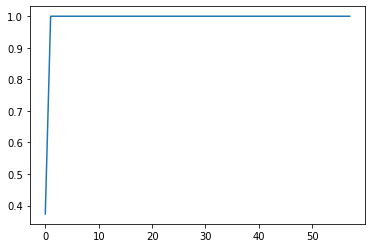

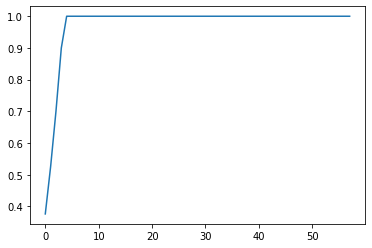

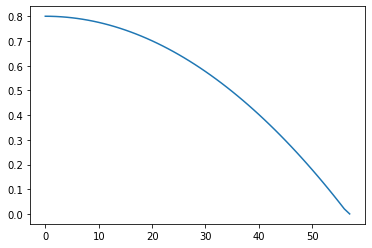

In [277]:
plt.plot(hist_Ip[:])
plt.show()
plt.plot(hist_Id[:])
plt.show()
plt.plot(hist_It[:])
plt.show()

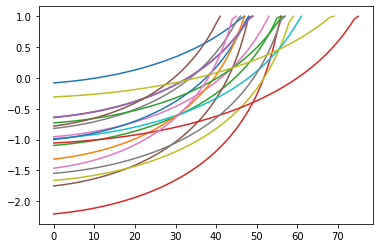

In [278]:
for i in range(n):
    for j in range(m):
        if alpha_hat[i,j] != -1:
            t = 10
            hist_I = []
            while True:
                hist_I.append(get_eta(i,j))
                if get_It(i,j) == 0.0: break
                t+=1
            plt.plot(hist_I)

In [279]:
step = .1

t = 10
T = np.zeros((n,m),dtype=np.float64)

while t < 100:
    for i in range(n):
        for j in range(m):
            if alpha_hat[i,j] != -1:
                alpha[i,j] = get_alpha(i,j)
                beta[i,j] = get_beta(i,j)
                gamma[i,j] = get_gamma(i,j)
                eta = get_eta(i,j)
                if T[i,j] == 0 and eta > eta_def:
                    T[i,j] = max(t-step,0)
                    
    t += step
    


In [280]:
T

array([[54.9,  0. , 57.4, 64.4, 65.5, 57.4, 57.6],
       [ 0. , 62.1, 54.8,  0. , 67.9, 70. ,  0. ],
       [ 0. , 57. , 56.4,  0. , 65.1, 83.5,  0. ],
       [57.4, 50.1, 53.7, 65.8, 76.4,  0. ,  0. ]])

In [281]:
step = .1

T1 = np.zeros((n,m),dtype=np.float64)
T2 = np.zeros((n,m),dtype=np.float64)
eta_plus = eta_def
eta_minus = 0.1
t=20
while t < 100:
    for i in range(n):
        for j in range(m):
            if alpha_hat[i,j] != -1:
                eta = get_eta(i,j)
    
                if T2[i,j] == 0 and eta > eta_plus:
                    T2[i,j] = max(t-step,0)
                if T1[i,j] == 0 and eta > eta_minus:
                    T1[i,j] = max(t-step,0)
                    
    t += step

In [282]:
T1

array([[28.1,  0. , 45.3, 56.1, 62.3, 45.4, 53.6],
       [ 0. , 52.9, 45.4,  0. , 62.7, 59.8,  0. ],
       [ 0. , 48.9, 50.5,  0. , 52.6, 72.1,  0. ],
       [45.3, 41.2, 48.9, 60.2, 50.9,  0. ,  0. ]])

In [283]:
T2

array([[54.9,  0. , 57.4, 64.4, 65.5, 57.4, 57.6],
       [ 0. , 62.1, 54.8,  0. , 67.9, 70. ,  0. ],
       [ 0. , 57. , 56.4,  0. , 65.1, 83.5,  0. ],
       [57.4, 50.1, 53.7, 65.8, 76.4,  0. ,  0. ]])

In [284]:
np.amin(T1[alpha_hat != -1])

28.100000000000115

In [285]:
np.amax(T2[alpha_hat != -1])

83.49999999999952

In [286]:
Smax = []
for i in range(n):
    T22 = T2[i]
    Smax.append(np.amax(T22[T22 != 0])) 
print(Smax)

[65.50000000000054, 70.00000000000028, 83.49999999999952, 76.39999999999992]


In [287]:
Smin = []
for i in range(n):
    T11 = T1[i]
    Smin.append(np.amin(T11[T11!=0])) 
print(Smin)

[28.100000000000115, 45.40000000000036, 48.90000000000041, 41.2000000000003]


In [288]:
kaka= []
for i in range(n):
    T00 = T[i]
    kaka.append(np.amin(T00[T00!=0])) 
print(kaka)

[54.90000000000053, 54.80000000000053, 56.40000000000055, 50.10000000000046]


In [289]:
etta_huinia = {0.5 : [25, 53 ],
               0.6 : [26, 54 ],
               0.7 : [27, 55 ],
               0.8 : [28, 56 ],
               0.9 : [29, 57 ]
              }
t_minus, t_plus = etta_huinia[eta_def]

In [290]:
for i in range(n):
    if (kaka[i]<t_minus):
        print(f"{i} критична херня")
    elif (kaka[i] > t_plus):
        print(f"{i} заебісь херня")
    else: print(f"{i} середня херня")

0 середня херня
1 середня херня
2 середня херня
3 середня херня
